[公式サンプル](http://www.tensorflow.org/get_started) では線形回帰を行った。

せっかくなので、もうちょっとだけ複雑にした関係式で、回帰(パラメータ推定)を行う

(0, 0.4)

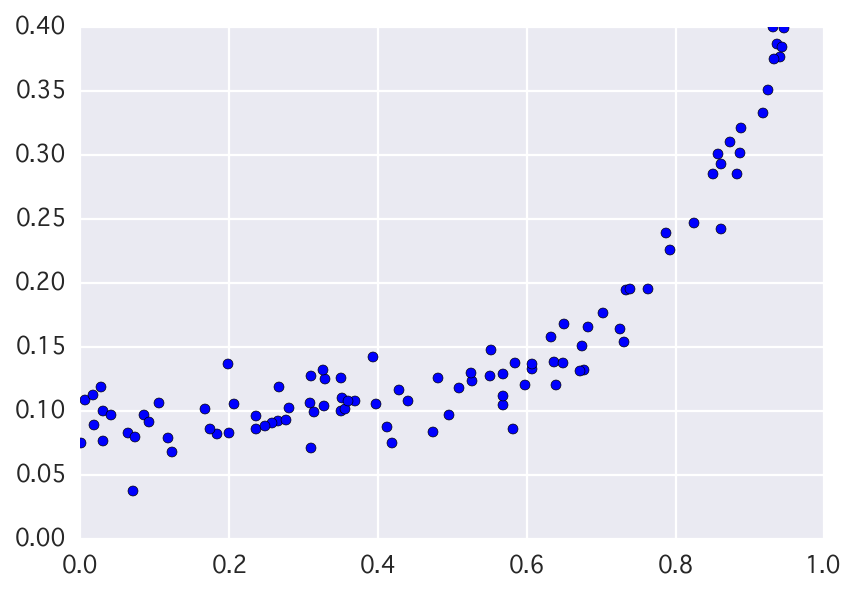

In [41]:
%matplotlib inline
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# http://www.tensorflow.org/get_started
x_data = np.float32(np.random.rand(1, 100)) # Random input
noise = np.random.normal(scale=0.02, size=(1, 100))
y_data = 0.4 * (x_data ** 5) + 0.1 + noise

plt.scatter(x_data[0], y_data[0])
plt.xlim(0, 1.0)
plt.ylim(0, 0.4)

y = a x^5 + b の関係性の直線を引いた。

関数の形は既知、a・bのパラメーターは未知として、a・bのパラメータを推定する。(正解は a = 0.4, b = 0.1)

In [43]:
# Construct a linear model.
b = tf.Variable(tf.zeros([1]))
a = tf.Variable(tf.random_uniform([1, 1], -1.0, 1.0, seed=1))
y = tf.matmul(a, tf.pow(x_data, 5)) + b

# Minimize the squared errors.
loss = tf.reduce_mean(tf.square(y - y_data))
optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

# For initializing the variables.
init = tf.initialize_all_variables()

# Launch the graph
sess = tf.Session()
sess.run(init)

# Fit the plane.
result = []  # a, b, y
for step in range(0, 150):
    sess.run(train)
    a_, b_ = sess.run(a)[0, 0], sess.run(b)[0]
    y_ = sess.run(y)
    
    if step % 10 == 0:
        print(a_, b_)
        result.append((a_, b_, y_))


(-0.4357608, 0.23564035)
(-0.081456311, 0.1736384)
(0.12250848, 0.14128263)
(0.23962969, 0.12270321)
(0.30688334, 0.11203448)
(0.34550196, 0.10590826)
(0.3676776, 0.10239045)
(0.38041139, 0.10037044)
(0.38772342, 0.099210493)
(0.39192215, 0.098544434)
(0.39433318, 0.098161966)
(0.39571765, 0.097942337)
(0.39651263, 0.097816221)
(0.39696911, 0.097743809)
(0.39723128, 0.097702228)


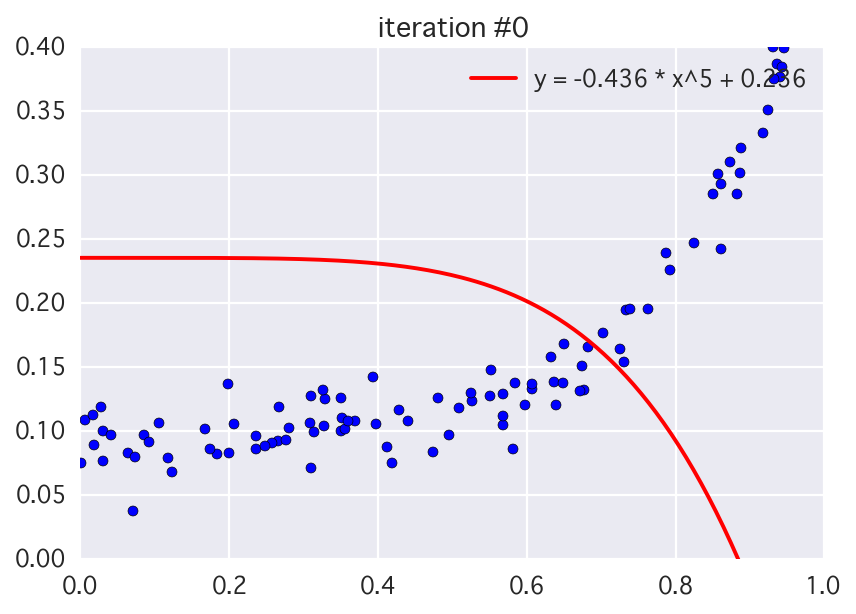

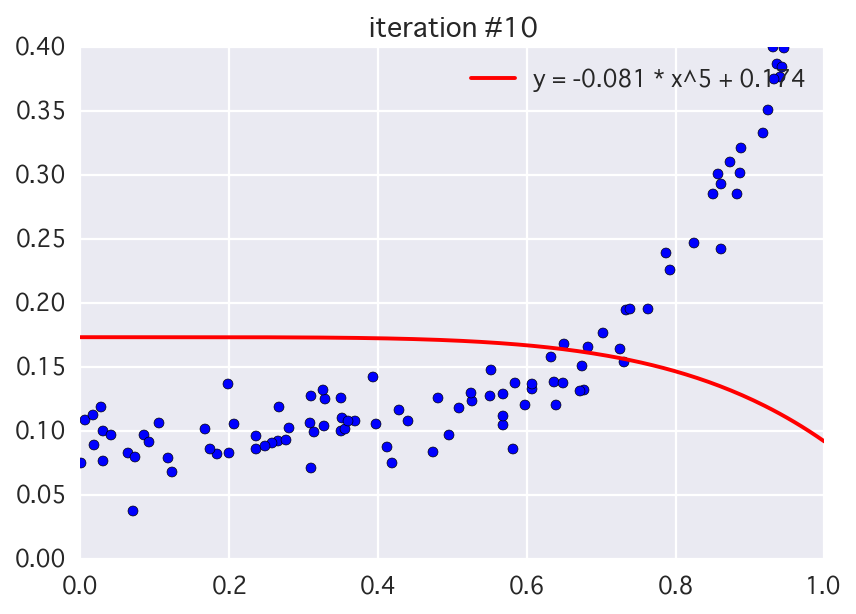

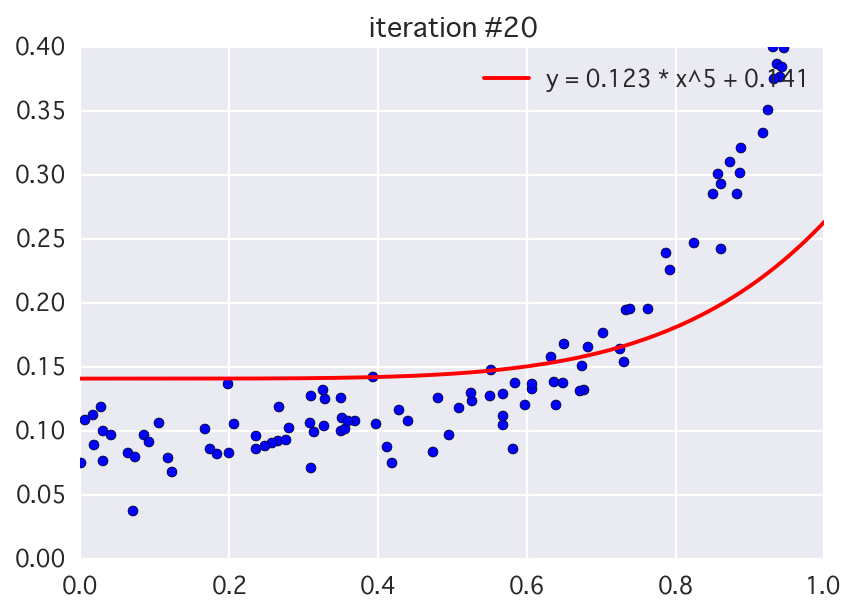

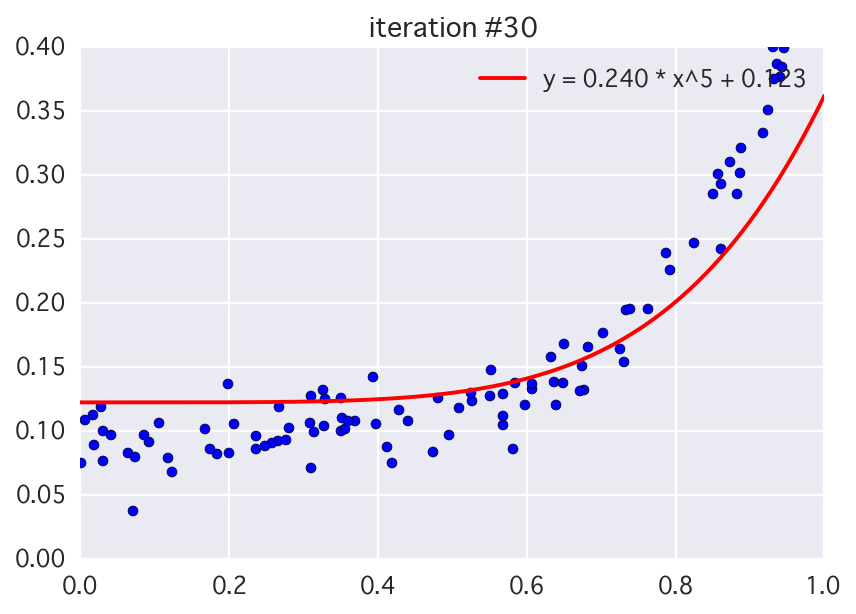

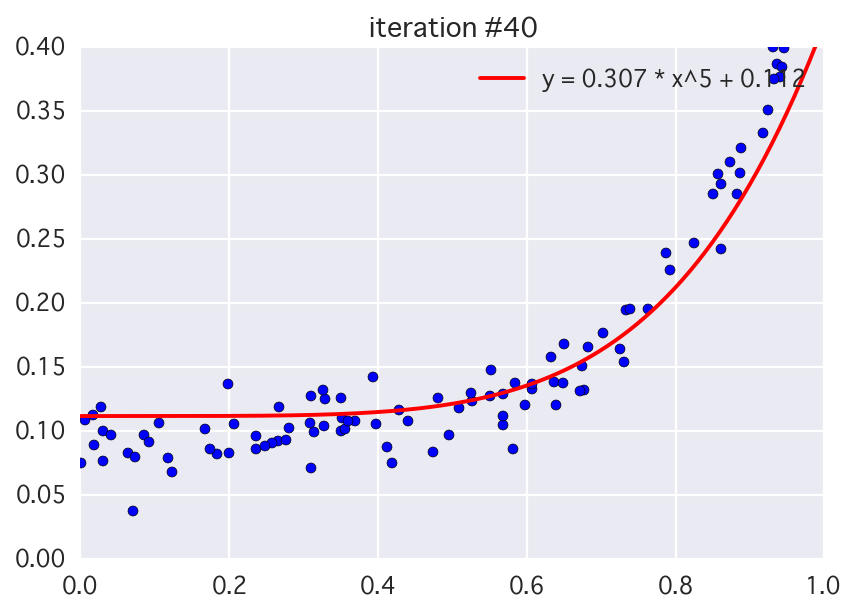

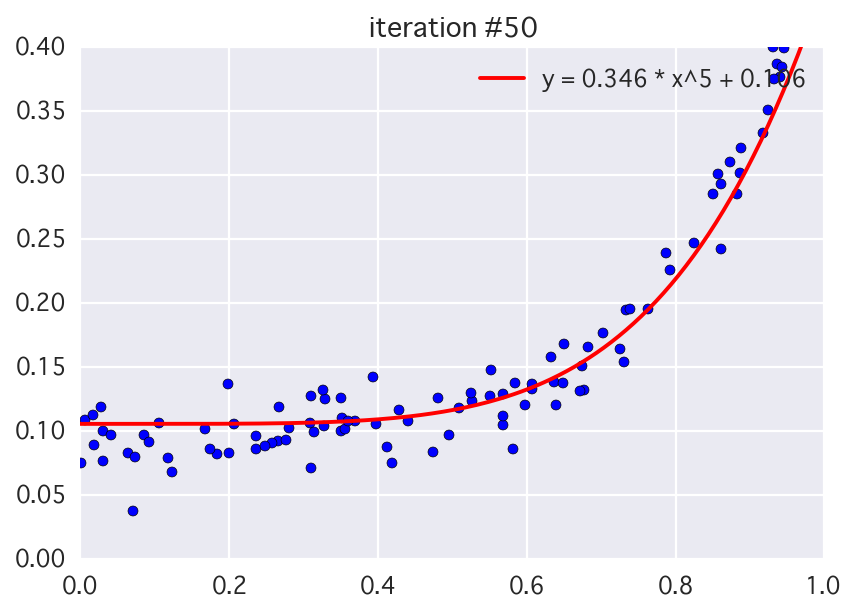

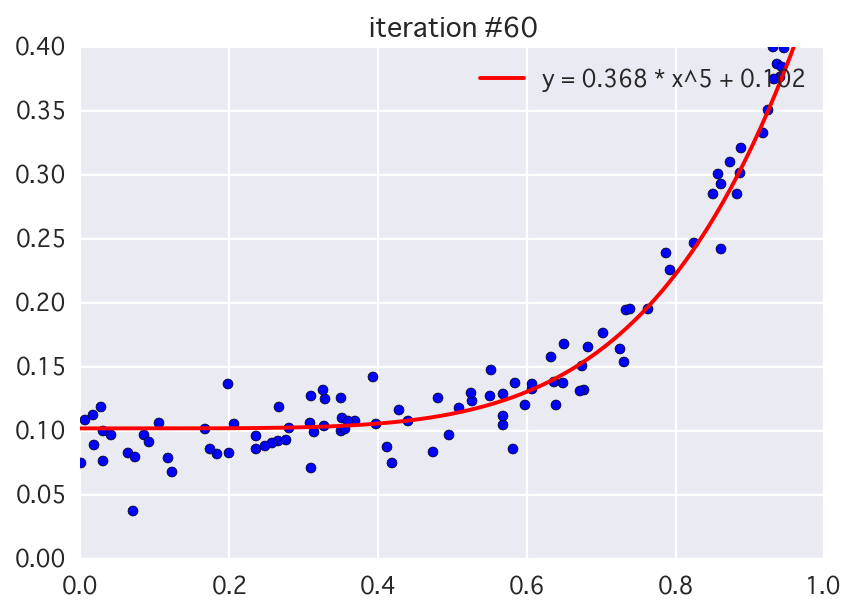

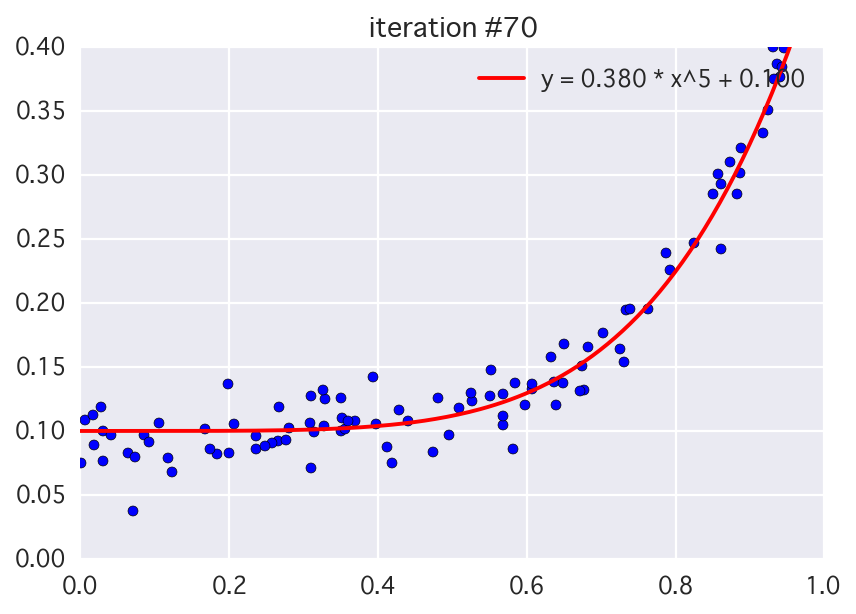

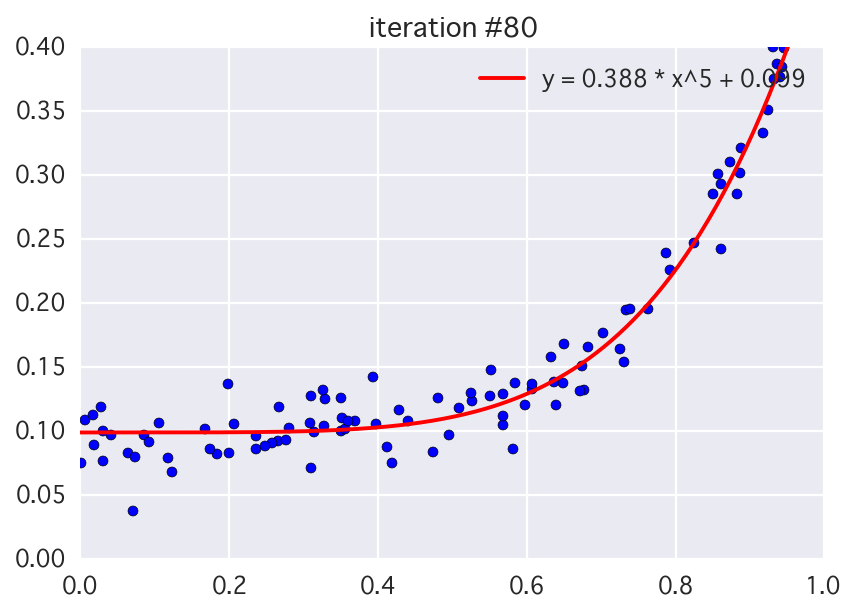

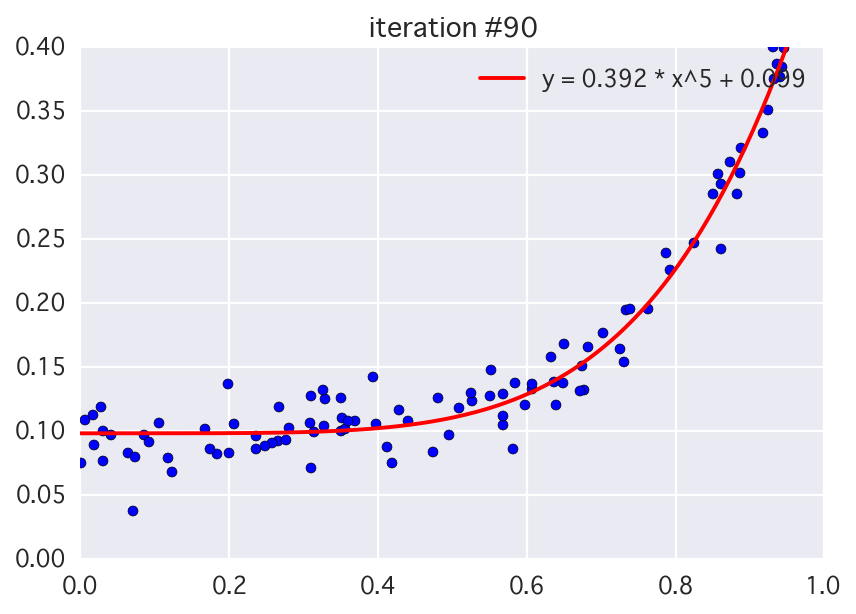

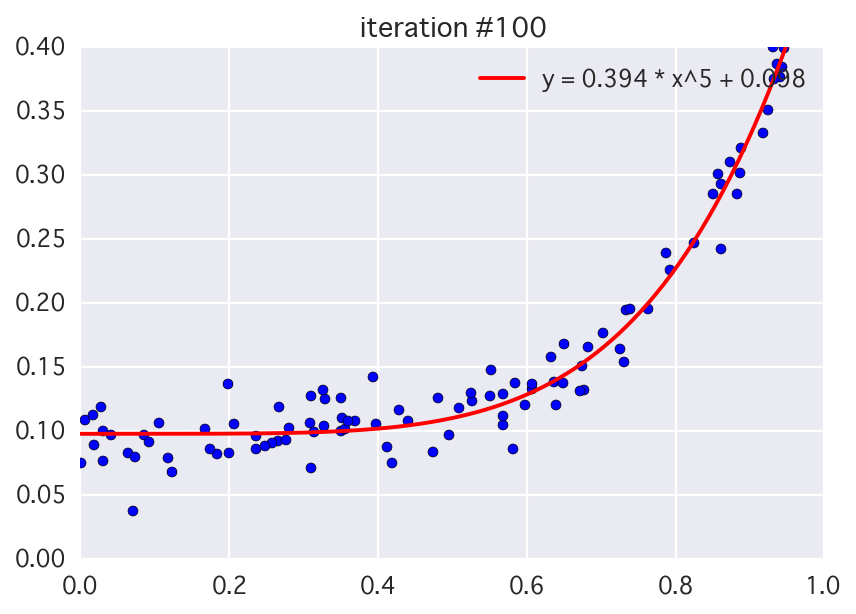

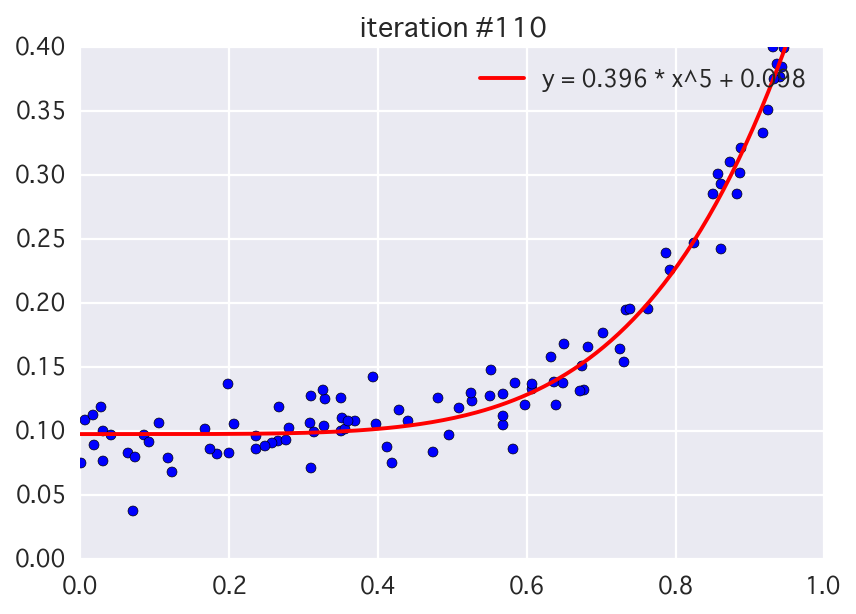

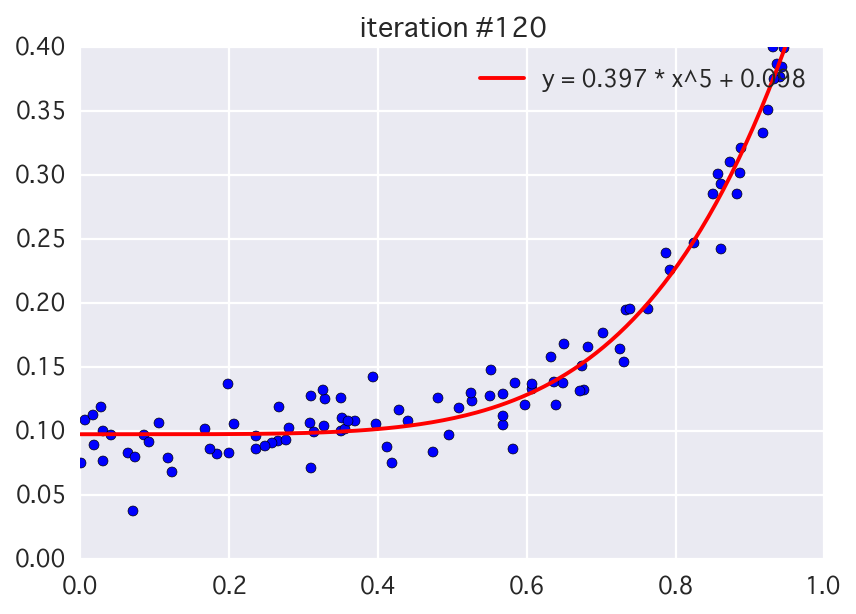

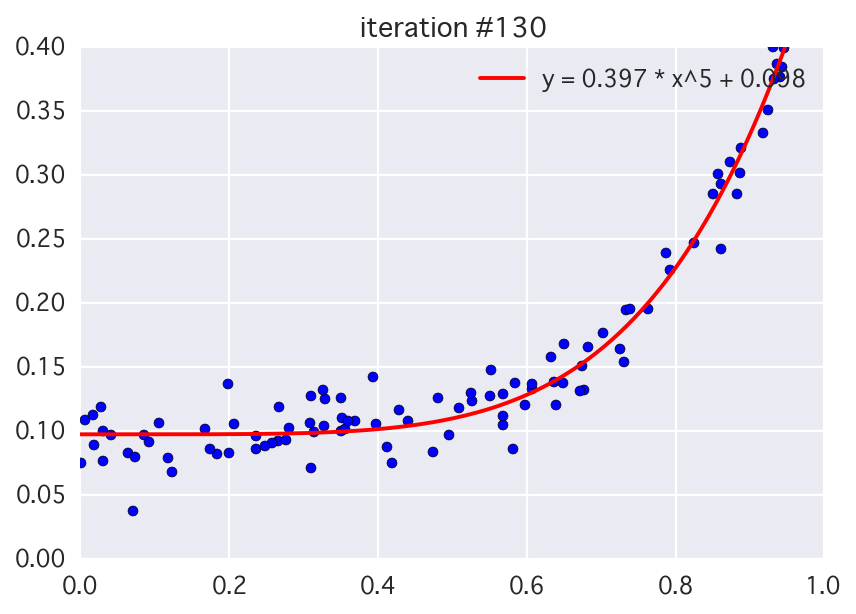

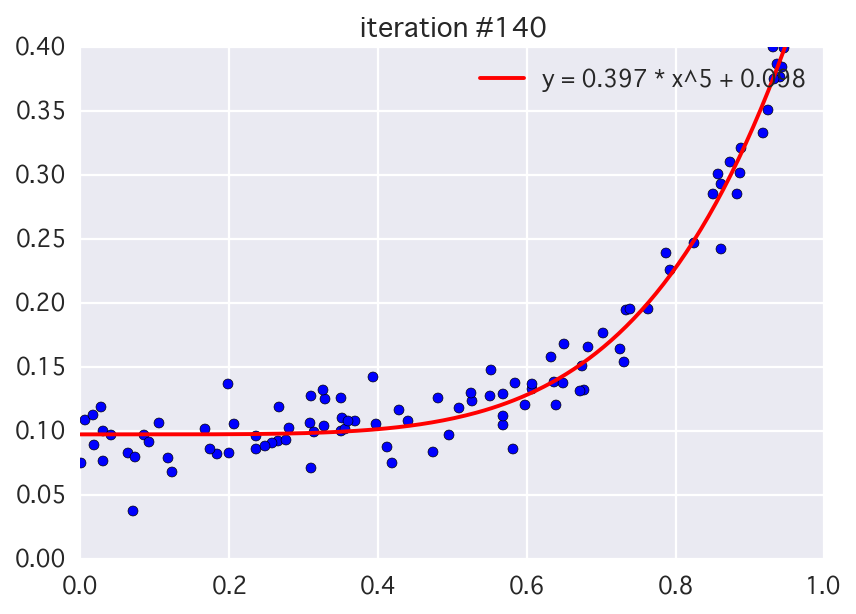

In [44]:
x = np.linspace(0, 1, num=200)

for i, (a_, b_, _) in enumerate(result):
    y_ = a_ * np.power(x, 5) + b_
    
    plt.figure()
    plt.scatter(x_data[0], y_data[0])
    plt.plot(x, y_, label='y = %.3f * x^5 + %.3f' % (a_, b_), c='r')
    plt.title("iteration #%d" % (i * 10))
    plt.legend()
    plt.xlim(0, 1.0)
    plt.ylim(0, 0.4)

初期値では全然フィッティングできていないが、最後のイテレーションでは曲線フィッティングができている！